In [124]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


In [125]:
# batch_size = 32
# epochs = 40
# lr = 0.01
# train_ratio = 0.9

In [126]:
batch_size = 50
epochs = 1000
lr = 0.01
train_ratio = 0.7

In [127]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv( "test.csv" )

In [128]:
print(f"train shape : {df_train.shape}")
print(f" test shape : {df_test.shape}")

train shape : (7160, 184)
 test shape : (1791, 183)


In [129]:
df_train.head(10)

ID appearedTimeOfDay  appearedHour  \
0  NzM4OTYzMzQxNTMyNzc1MDQ0NQ==           evening            19   
1  NDEwMjE0MzYwNzUyMjE2OTI0NQ==             night             5   
2  OTQ3NzU5MTA4MzgzODg2NzYxMw==           evening            19   
3  MTU2OTA5MTcyMDMzOTc0NzczODk=           morning            11   
4  NTE2OTkxNjE3OTUzODY0MTE4MQ==           evening            18   
5  NDIxMTM5NjUwODY2MzMxNTQwNQ==         afternoon            13   
6  MTQyMzc1MTk5OTQ5NTU0NDYzOTc=             night             4   
7  NDIxODg3ODg5MTc0MjA0MDQ0NQ==         afternoon            15   
8  MTQyNTE3NTc3NzU4MjYzNDM5MTc=             night            22   
9  MTA0MjI1MTc0MjEzMzcyMzM0Mzc=         afternoon            15   

   appearedMinute  terrainType  closeToWater         city  continent  \
0              10           13         False      Bangkok       Asia   
1              19           13          True     New_York    America   
2              46            0          True     New_York    America   
3              10            0          True       Hobart  Australia   
4              32           13          True  Los_Angeles    America   
5               7           13         False      Kuching       Asia   
6               1           14         False  Mexico_City    America   
7              19            0          True     New_York    America   
8              18           13         False      Chicago    America   
9              36            0          True     New_York    America   

        weather  temperature  ...    cooc_143  cooc_144 cooc_145  cooc_146  \
0         Clear         27.8  ...       False     False    False     False   
1         Clear         26.1  ...       False     False    False     False   
2         Clear         24.7  ...       False     False    False     False   
3         Clear         12.7  ...       False     False    False     False   
4  PartlyCloudy         19.1  ...       False     False    False     False   
5         Clear         25.0  ...       False     False    False     False   
6         Clear         26.7  ...       False     False    False     False   
7         Clear         29.7  ...       False     False    False     False   
8  PartlyCloudy         26.2  ...       False     False    False     False   
9  PartlyCloudy         28.1  ...       False     False    False     False   

   cooc_147  cooc_148  cooc_149  cooc_150  cooc_151  class  
0     False     False     False     False     False      2  
1     False     False     False     False     False      5  
2     False     False     False     False     False      3  
3     False     False     False     False     False      4  
4     False     False     False     False     False      3  
5     False     False     False     False     False      2  
6     False     False     False     False     False      5  
7     False     False     False     False     False      5  
8     False     False     False     False     False      0  
9     False     False     False     False     False      3  

[10 rows x 184 columns]

In [130]:
df_test = df_test.rename(columns = {'id':'ID'})

In [131]:
dataset = pd.concat([df_train.drop(['ID','class'],axis =1),df_test.drop(['ID'],axis = 1)], axis = 0, ignore_index = False)

In [132]:
# df_train=df_train.drop(['ID','appearedTimeOfDay','appearedHour','appearedMinute','city','weather','weatherIcon','continent'],axis=1)
# df_test=df_test.drop(['id','appearedTimeOfDay','appearedHour','appearedMinute','city','weather','weatherIcon','continent'],axis=1)

In [133]:
dataset

appearedTimeOfDay  appearedHour  appearedMinute  terrainType  \
0              evening            19              10           13   
1                night             5              19           13   
2              evening            19              46            0   
3              morning            11              10            0   
4              evening            18              32           13   
5            afternoon            13               7           13   
6                night             4               1           14   
7            afternoon            15              19            0   
8                night            22              18           13   
9            afternoon            15              36            0   
10               night            20              58           13   
11               night            21               5           10   
12             morning            10              20           13   
13             morning            10              40           12   
14             morning             7              18           13   
15               night             4              23            7   
16             evening            16              52           13   
17             evening            17              18            4   
18           afternoon            13              12           13   
19             morning             9              54            0   
20           afternoon            14              21            5   
21             evening            19              41           13   
22               night            21              59            5   
23               night             4              52            0   
24               night             3              52            7   
25           afternoon            14              55            7   
26               night             5              55            7   
27               night             3              39            0   
28               night            20               4            8   
29               night            23               3           12   
...                ...           ...             ...          ...   
1761         afternoon            15              34           13   
1762             night             5              35           13   
1763         afternoon            14              15            5   
1764             night             1              39           13   
1765           evening            16              30           12   
1766           evening            18              48            7   
1767             night             1               0            7   
1768             night            23              52           13   
1769         afternoon            13              38           13   
1770             night             5              11            0   
1771         afternoon            14              46           12   
1772             night             1              55            7   
1773             night             4              19            7   
1774             night            20              58            0   
1775             night             2              31            0   
1776             night            21               6           13   
1777           morning            10              23           12   
1778           morning            11              55           13   
1779             night             4              42           13   
1780           evening            17              49            5   
1781             night             5              48            8   
1782           evening            16              17            0   
1783             night             4               6           13   
1784           morning             9              26           12   
1785             night             4              40           10   
1786             night            23              52           14   
178

In [134]:
print(f"numerical feature: {df_train.describe().shape}")
dataset.describe()
#查詢數值類別資料

numerical feature: (8, 10)


appearedHour  appearedMinute  terrainType  temperature    windSpeed  \
count   8951.000000     8951.000000  8951.000000  8951.000000  8951.000000   
mean      10.654452       30.643168     9.720590    23.281008     7.510169   
std        7.152858       17.439499     4.941831     6.054764     4.617323   
min        0.000000        0.000000     0.000000     4.800000     0.000000   
25%        4.000000       16.000000     7.000000    18.500000     3.920000   
50%       10.000000       32.000000    13.000000    23.800000     6.630000   
75%       17.000000       46.000000    13.000000    27.500000    10.010000   
max       23.000000       59.000000    16.000000    41.200000    56.130000   

          pressure  population_density  gymDistanceKm  pokestopDistanceKm  
count  8951.000000         8951.000000    8951.000000         8951.000000  
mean   1014.904328         1541.905140       2.987937            0.562947  
std       5.828866         2230.860698      46.908371            7.479374  
min     996.330000            0.000000       0.004516            0.000319  
25%    1010.695000           69.585650       0.178437            0.050817  
50%    1015.290000          635.549800       0.314365            0.132209  
75%    1019.290000         1955.863600       0.577406            0.310317  
max    1034.170000        10000.000000    3859.424664          455.313099

In [135]:
# print(f"numerical feature: {df_train.describe().shape}")
# dataset.describe()
# #查詢數值類別資料

In [136]:
#terrainType是類別型資料
dataset['terrainType'] = dataset['terrainType'].astype(str)

In [137]:
dataset.columns

Index(['appearedTimeOfDay', 'appearedHour', 'appearedMinute', 'terrainType',
       'closeToWater', 'city', 'continent', 'weather', 'temperature',
       'windSpeed',
       ...
       'cooc_142', 'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147',
       'cooc_148', 'cooc_149', 'cooc_150', 'cooc_151'],
      dtype='object', length=182)

In [138]:
# #取得數值型態的欄位
# numeric_data = df_train._get_numeric_data()
# numeric_data.columns
# # df_train = df_train._get_numeric_data()
# # df_train.columns

In [139]:
#這行意思??
#dataset[['terrainType','class']].groupby(['terrainType']).agg({'class':'count', 'terrainType':'count'}).sort_values(by='class', ascending=False)
df_train[['terrainType','class']].groupby(['terrainType']).agg({'class':'count', 'terrainType':'count'}).sort_values(by='class', ascending=False)

class  terrainType
terrainType                    
13            3306         3306
0             1114         1114
12             930          930
7              529          529
14             485          485
8              318          318
5              219          219
10             133          133
1               72           72
2               32           32
4               12           12
16               8            8
9                2            2

In [140]:
numeric_data = dataset.select_dtypes(include = ['number'])

In [141]:
numeric_data.columns

Index(['appearedHour', 'appearedMinute', 'temperature', 'windSpeed',
       'pressure', 'population_density', 'gymDistanceKm',
       'pokestopDistanceKm'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


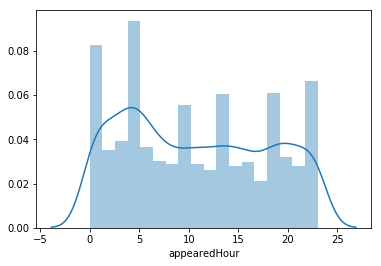

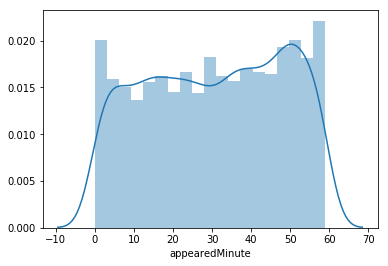

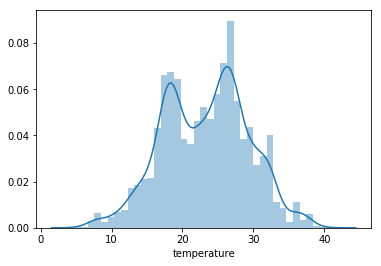

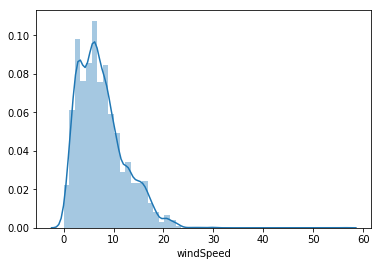

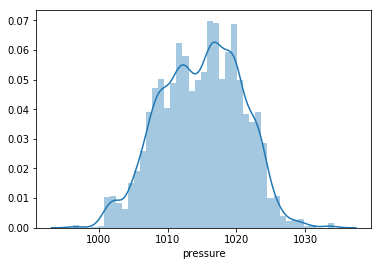

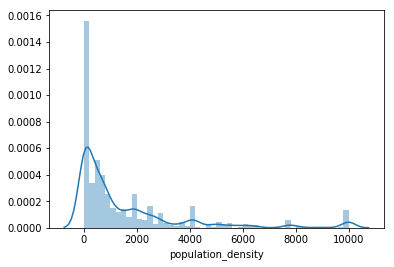

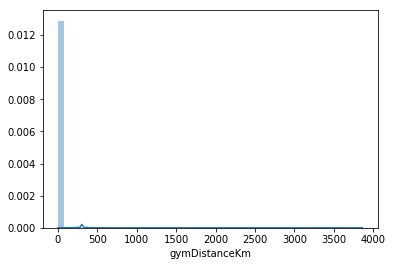

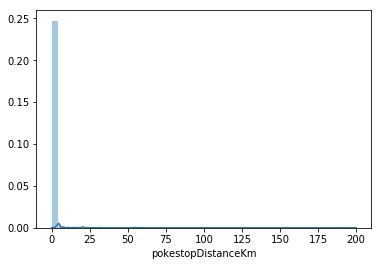

In [142]:
# drop掉每個欄位的NA值並劃出其分布
for i in numeric_data:
    temp = df_train[i]
    #print(f"there are {df_train[i].shape[0]-temp.shape[0]} ")
    sns.distplot(temp) 
    plt.show()

In [143]:
# num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# # na drop should be done series by series
# skewed_feats = df_train[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
# print(skewed_feats)
# skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# # print(skewed_feats)
# df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )

In [144]:
num_feats = dataset.select_dtypes(include = ['number']).columns
skewed_feats = df_train[num_feats].apply(func = skew, axis = 0)
print(skewed_feats)

appearedHour           0.176763
appearedMinute        -0.094798
temperature           -0.070205
windSpeed              1.008963
pressure              -0.111105
population_density     2.241779
gymDistanceKm         63.854778
pokestopDistanceKm    36.765666
dtype: float64


In [146]:
skewed_feats = skewed_feats [ skewed_feats > 0.75].index

In [147]:
skewed_feats

Index(['windSpeed', 'population_density', 'gymDistanceKm',
       'pokestopDistanceKm'],
      dtype='object')

In [148]:
dataset[skewed_feats] = np.log1p(dataset[skewed_feats])

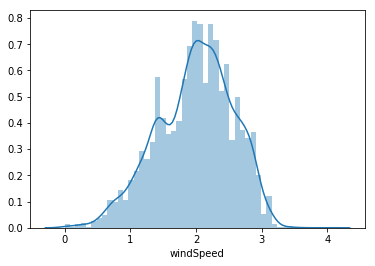

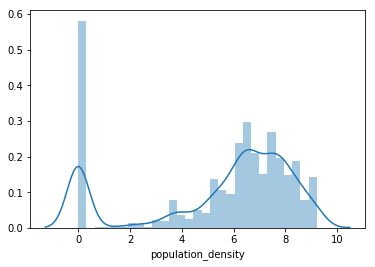

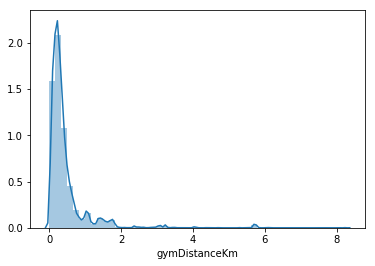

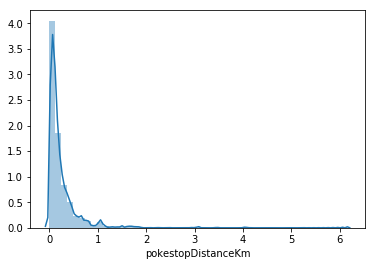

In [149]:
for i in skewed_feats:
    temp = dataset[i]
    sns.distplot(temp) 
    plt.show()

In [150]:
#只有出現一行terrain??
dataset.describe(include = 'O')

appearedTimeOfDay terrainType      city continent weather weatherIcon
count               8951        8951      8951      8951    8951        8951
unique                 4          14        75         9      25           8
top                night          13  New_York   America   Clear   clear-day
freq                4739        4122      1724      5041    5431        2823

In [151]:
dataset.columns

Index(['appearedTimeOfDay', 'appearedHour', 'appearedMinute', 'terrainType',
       'closeToWater', 'city', 'continent', 'weather', 'temperature',
       'windSpeed',
       ...
       'cooc_142', 'cooc_143', 'cooc_144', 'cooc_145', 'cooc_146', 'cooc_147',
       'cooc_148', 'cooc_149', 'cooc_150', 'cooc_151'],
      dtype='object', length=182)

In [152]:
dataset_dum = pd.get_dummies(dataset);
dataset_dum.columns

Index(['appearedHour', 'appearedMinute', 'closeToWater', 'temperature',
       'windSpeed', 'pressure', 'population_density', 'urban', 'suburban',
       'midurban',
       ...
       'weather_WindyandFoggy', 'weather_WindyandPartlyCloudy',
       'weatherIcon_clear-day', 'weatherIcon_clear-night',
       'weatherIcon_cloudy', 'weatherIcon_fog',
       'weatherIcon_partly-cloudy-day', 'weatherIcon_partly-cloudy-night',
       'weatherIcon_rain', 'weatherIcon_wind'],
      dtype='object', length=311)

In [153]:
from sklearn import preprocessing
dataset_dum[num_feats] = preprocessing.scale(dataset[num_feats])
dataset_dum[num_feats].head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


appearedHour  appearedMinute  temperature  windSpeed  pressure  \
0      1.166808       -1.183768     0.746395   0.546368 -1.019866   
1     -0.790561       -0.667669     0.465609   0.493535  0.695830   
2      1.166808        0.880627     0.234373   1.548480  1.426716   
3      0.048312       -1.183768    -1.747648   1.160696 -0.122557   
4      1.026996        0.077807    -0.690571  -0.127692 -0.608099   

   population_density  gymDistanceKm  pokestopDistanceKm  
0            1.095041      -0.030837           -0.273872  
1           -1.862379       0.012945           -0.144405  
2           -1.862379      -0.426249           -0.458884  
3           -0.208558      -0.433415           -0.636860  
4            0.971842      -0.612653           -0.455604

In [154]:
# # drop掉每個欄位的NA值並劃出其分布
# for i in numeric_data:
#     temp = df_train[i]
#     #print(f"there are {df_train[i].shape[0]-temp.shape[0]} ")
#     sns.distplot(temp) 
#     plt.show()

In [155]:
x_ = dataset_dum.iloc[:df_train.shape[0],0:].values
x1_ = dataset_dum.iloc[df_train.shape[0]:,0:].values
y_ = df_train.iloc[:,-1].values
# min-max normalization


# one hot encoding
y_one_hot = np.zeros((len(y_), 6))  
y_one_hot[np.arange(len(y_)), y_] = 1

In [156]:
# min-max normalization
# jamesyung

# x_=dataset_dum.iloc[:,0:-1].values 
# x2_=df_train_dum.iloc[:,0:-1].values 
# y_=df_train.iloc[:,-1].values

# one hot encoding
# y_one_hot = np.zeros((len(y),6 ))  
# y_one_hot[np.arange(len(y)), y] = 1

In [157]:
numeric_features = df_train.select_dtypes(include = [np.number])
correlation = numeric_features.corr()
print(correlation['class'].sort_values(ascending = False))

class                 1.000000
pressure              0.259179
terrainType           0.076269
appearedHour          0.070884
appearedMinute        0.028221
windSpeed             0.019214
pokestopDistanceKm    0.006227
population_density   -0.009242
gymDistanceKm        -0.013153
temperature          -0.055098
Name: class, dtype: float64


In [158]:
x_.shape

(7160, 311)

In [159]:
x1_.shape

(1791, 311)

In [160]:
y_.shape

(7160,)

In [161]:
# def onehot_enc(y):
#     onehot = np.zeros((len(y), y.max()-y.min()+1))
#     onehot[np.arange(len(y)), y] = 1
#     return onehot

In [162]:
# x_, y_ = df_train, df_test

# # min-max normalization
# #x_ = x_ / x_.max() 

# one hot encoding
# y_one_hot = np.zeros((len(y_), 10))  
# y_one_hot[np.arange(len(y_)), y_] = 1

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x_, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y_)

In [164]:
from tensorflow.keras.layers import Dense, Dropout

In [165]:
tf.reset_default_graph()
model = tf.keras.Sequential()
model.add(Dense(int(x_.shape[1]/2), activation='relu', input_shape=(x_.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(int(x_.shape[1]/2), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax')) 

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 155)               48360     
_________________________________________________________________
dropout (Dropout)            (None, 155)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 155)               24180     
_________________________________________________________________
dropout_1 (Dropout)          (None, 155)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 936       
Total params: 73,476
Trainable params: 73,476
Non-trainable params: 0
_________________________________________________________________
None


In [166]:
sgd = tf.keras.optimizers.SGD(lr = 0.001)
Adam = tf.keras.optimizers.Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [167]:
dataset_dum.describe()

appearedHour  appearedMinute   temperature     windSpeed      pressure  \
count  8.951000e+03    8.951000e+03  8.951000e+03  8.951000e+03  8.951000e+03   
mean   1.151030e-17    3.373709e-17  3.673373e-16 -3.703141e-16 -1.404018e-14   
std    1.000056e+00    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -1.489621e+00   -1.757211e+00 -3.052479e+00 -3.447580e+00 -3.186789e+00   
25%   -9.303727e-01   -8.397022e-01 -7.896716e-01 -6.839076e-01 -7.221924e-01   
50%   -9.150029e-02    7.780656e-02  8.572115e-02  7.717672e-02  6.616956e-02   
75%    8.871842e-01    8.806268e-01  6.968444e-01  7.132639e-01  7.524477e-01   
max    1.726057e+00    1.626103e+00  2.959652e+00  3.569243e+00  3.305402e+00   

       population_density  gymDistanceKm  pokestopDistanceKm  \
count        8.951000e+03   8.951000e+03        8.951000e+03   
mean        -2.951003e-16  -5.239171e-17       -1.547937e-17   
std          1.000056e+00   1.000056e+00        1.000056e+00   
min         -1.862379e+00  -7.096136e-01       -6.468376e-01   
25%         -4.158152e-01  -4.494837e-01       -5.100849e-01   
50%          3.315335e-01  -2.716514e-01       -3.029311e-01   
75%          7.131657e-01   2.553001e-02        1.027496e-01   
max          1.267532e+00   1.273647e+01        1.635489e+01   

       appearedTimeOfDay_afternoon  appearedTimeOfDay_evening  \
count                  8951.000000                8951.000000   
mean                      0.147693                   0.137750   
std                       0.354815                   0.344657   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   0.000000   
max                       1.000000                   1.000000   

             ...         weather_WindyandFoggy  weather_WindyandPartlyCloudy  \
count        ...                   8951.000000                   8951.000000   
mean         ...                      0.000335                      0.000112   
std          ...                      0.018305                      0.010570   
min          ...                      0.000000                      0.000000   
25%          ...                      0.000000                      0.000000   
50%          ...                      0.000000                      0.000000   
75%          ...                      0.000000                      0.000000   
max          ...                      1.000000                      1.000000   

       weatherIcon_clear-day  weatherIcon_clear-night  weatherIcon_cloudy  \
count            8951.000000              8951.000000         8951.000000   
mean                0.315384                 0.281309            0.046587   
std                 0.464694                 0.449663            0.210764   
min                 0.000000                 0.000000            0.000000   
25%                 0.000000                 0.000000            0.000000   
50%                 0.000000                 0.000000            0.000000   
75%                 1.000000                 1.000000            0.000000   
max                 1.000000                 1.000000            1.000000   

       weatherIcon_fog  weatherIcon_partly-cloudy-day  \
count      8951.000000                    8951.000000   
mean          0.005363                       0.197408   
std           0.073037                       0.398065   
min           0.000000                       0.000000   
25%           0.000000                       0.000000   
50%           0.000000                       0.000000   
75%           0.000000                       0.000000   
max           1.000000                       1.000000   

       weatherIcon_partly-cloudy-night  weatherIcon_rain  weatherIcon_wind  
count                      8951.000000       8951.000000       8951.000000  
mean                          0

In [168]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode = 'min')
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio,
                         verbose=1, shuffle=True, callbacks=[early_stopping])

Train on 4761 samples, validate on 2041 samples
Epoch 1/1000
4761/4761 [==============================] - 1s 139us/step - loss: 1.2528 - acc: 0.5295 - val_loss: 1.2196 - val_acc: 0.5443
Epoch 2/1000
4761/4761 [==============================] - 0s 89us/step - loss: 1.2463 - acc: 0.5377 - val_loss: 1.2192 - val_acc: 0.5443
Epoch 3/1000
4761/4761 [==============================] - 0s 86us/step - loss: 1.2498 - acc: 0.5316 - val_loss: 1.2189 - val_acc: 0.5453
Epoch 4/1000
4761/4761 [==============================] - 0s 86us/step - loss: 1.2472 - acc: 0.5234 - val_loss: 1.2188 - val_acc: 0.5463
Epoch 5/1000
4761/4761 [==============================] - 0s 87us/step - loss: 1.2530 - acc: 0.5306 - val_loss: 1.2187 - val_acc: 0.5463
Epoch 6/1000
4761/4761 [==============================] - 0s 86us/step - loss: 1.2420 - acc: 0.5306 - val_loss: 1.2185 - val_acc: 0.5463
Epoch 7/1000
4761/4761 [==============================] - 0s 85us/step - loss: 1.2463 - acc: 0.5314 - val_loss: 1.2185 - val_acc:

In [169]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode = 'min')
# model_history = model.fit(x=x_train, y=y_train,
#                           batch_size=batch_size,
#                           epochs=epochs,
#                           validation_split=1 - train_ratio,
#                          verbose=1, shuffle=True, callbacks=[early_stopping])

In [170]:
# model = tf.keras.Sequential()
# model.add(Dense(25, activation='relu', input_shape=(175,)))
# model.add(Dense(6, activation='softmax')) 

# print(model.summary())

In [171]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [172]:
# model_history = model.fit(x=x_train, y=y_train,
#                           batch_size=batch_size,
#                           epochs=epochs,
#                           validation_split=1 - train_ratio)

In [173]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

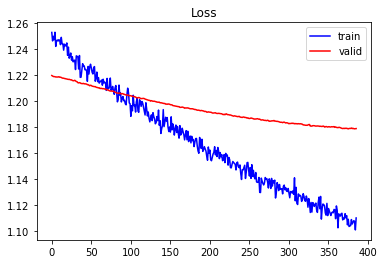

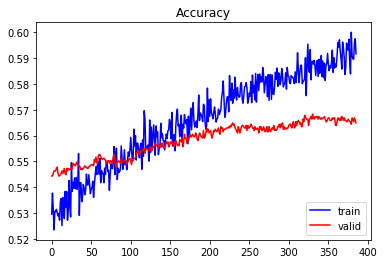

In [174]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [175]:
from sklearn.metrics import accuracy_score

In [176]:
y_predict = model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)

In [177]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.5977653631284916


In [178]:
tf.global_variables()

[<tf.Variable 'dense/kernel:0' shape=(311, 155) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(155,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(155, 155) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(155,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(155, 6) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(6,) dtype=float32>,
 <tf.Variable 'SGD/iterations:0' shape=() dtype=int64>,
 <tf.Variable 'SGD/lr:0' shape=() dtype=float32>,
 <tf.Variable 'SGD/momentum:0' shape=() dtype=float32>,
 <tf.Variable 'SGD/decay:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/iterations:0' shape=() dtype=int64>,
 <tf.Variable 'Adam/lr:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_1:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/beta_2:0' shape=() dtype=float32>,
 <tf.Variable 'Adam/decay:0' shape=() dtype=float32>,
 <tf.Variable 'training/SGD/Variable:0' shape=(311, 155) dtype=float32>,
 <tf.Variable 'training/SGD/Variable_1:0' shape=(155,) dtype=float32>,

In [179]:
x1_.shape

(1791, 311)

In [180]:
y_predict2 = model.predict_classes(x1_)

In [181]:
y_predict2.shape

(1791,)

In [182]:
df_test = pd.read_csv('test.csv')
df_test.shape

(1791, 183)

In [183]:
pd.DataFrame({'class': y_predict2}, index = df_test['id']).to_csv('submission11.csv')